<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 CROSS VALIDATION STATEGIES**
Cross-validation (CV) is a technique used in machine learning to evaluate the performance of a model by training it on different subsets of the data and testing it on the remaining subsets. This helps to avoid overfitting, which is a common problem in machine learning where a model becomes too specialized to the training data and does not generalize well to new data.

### **Different Approaches to Cross-Validation**

There are several different types of cross-validation, but the most common are:

**K-fold cross-validation**: This is the most widely used type of cross-validation. The data is divided into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold. This is repeated k times, and the results are averaged to get an overall measure of the model's performance.

**Leave-p-out cross-validation**: This is a special case of k-fold cross-validation where k is equal to the number of samples in the dataset. The model is trained on all but one sample, and then tested on the remaining sample. This is repeated for each sample in the dataset, and the results are averaged to get an overall measure of the model's performance.

**Repeated cross-validation**: This is a variation of k-fold cross-validation where the data is divided into k folds, but the folds are chosen randomly multiple times. This helps to reduce the variance of the estimates of the model's performance.

**Stratification**: When the data is unbalanced, it can be helpful to stratify the folds. This means that the folds are chosen so that they have the same proportion of each class of data. This helps to ensure that the model is not biased towards any particular class of data.

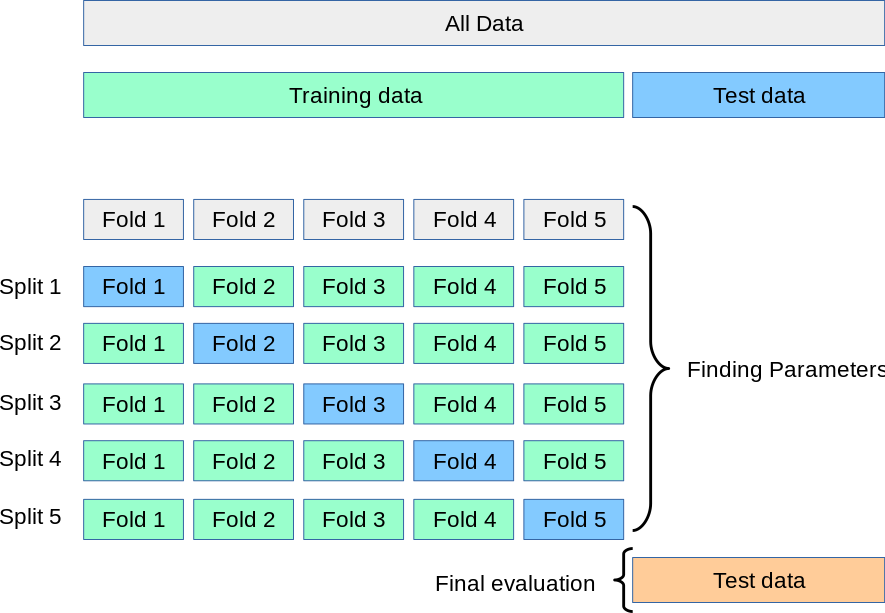

Cross Validation K-Fold:



### **Why CV?**

Cross-validation is a powerful technique for evaluating the performance of machine learning models. It is more reliable than simply splitting the data into a training set and a test set because it allows the model to be tested on a wider variety of data. This helps to ensure that the model is not overfitting to the training data.

Here are some of the advantages of using cross-validation:

* It is a more reliable way to evaluate the performance of a model than simply splitting the data into a training set and a test set.
* It can help to identify and avoid overfitting.
* It can be used to compare different models.
* It can be used to tune the hyperparameters of a model.

Here are some of the disadvantages of using cross-validation:

* It can be computationally expensive, especially for large datasets.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
import os


# Palette Setup
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)
import matplotlib as mpl
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

In [3]:
# make a synthetic dataset
X, y = make_circles(factor=0.5, n_samples=2000, random_state=0, noise=0.3)

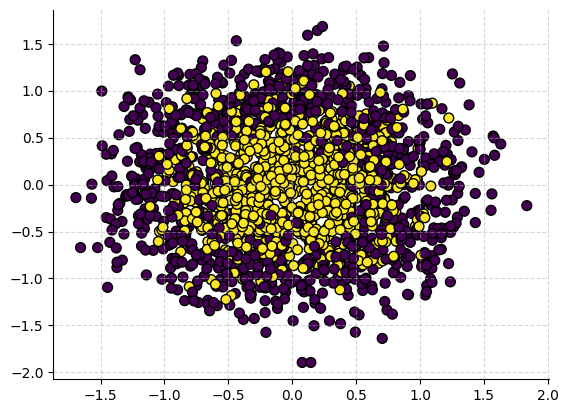

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
plt.grid(linestyle="--",alpha=0.5)

In [5]:
X_t, X_test, y_t, y_test = train_test_split(X,y,test_size=0.3,random_state=48)

tree = DecisionTreeClassifier()

tree.fit(X_t, y_t)

print(tree.score(X_t, y_t),tree.score(X_test, y_test))

1.0 0.7


In [6]:
scores = cross_val_score(tree, X_t, y_t, cv=5, )
print(np.average(scores))

0.6964285714285714


In [7]:
cv=sk.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1978)

In [8]:
scores = cross_validate(tree, X_t, y_t, cv=cv, return_train_score=True)
print("Test Score: {}".format(np.average(scores['test_score'])))
print("Train Score: {}".format(np.average(scores['train_score'])))

Test Score: 0.7107142857142857
Train Score: 1.0


In [9]:
scores

{'fit_time': array([0.00914049, 0.00506377, 0.01016974, 0.01230407, 0.00917029]),
 'score_time': array([0.01258564, 0.00740814, 0.00127316, 0.00132275, 0.0011301 ]),
 'test_score': array([0.70357143, 0.71071429, 0.675     , 0.725     , 0.73928571]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [10]:
results = pd.DataFrame(index=["Train","Valid","Test"],columns=["Base_Model","Hyperparmeter_Model"]);

results.loc[:,"Base_Model"] = [np.average(scores['train_score']),np.average(scores['test_score']),tree.score(X_test, y_test)];

results

<ipython-input-10-5959f60ae96b>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:,"Base_Model"] = [np.average(scores['train_score']),np.average(scores['test_score']),tree.score(X_test, y_test)];


,Base_Model,Hyperparmeter_Model
Train,1.000000,NaN
Valid,0.710714,NaN
Test,0.700000,NaN


# **Cross-Validation-Test-Train Dataset Management in a ML Project:**

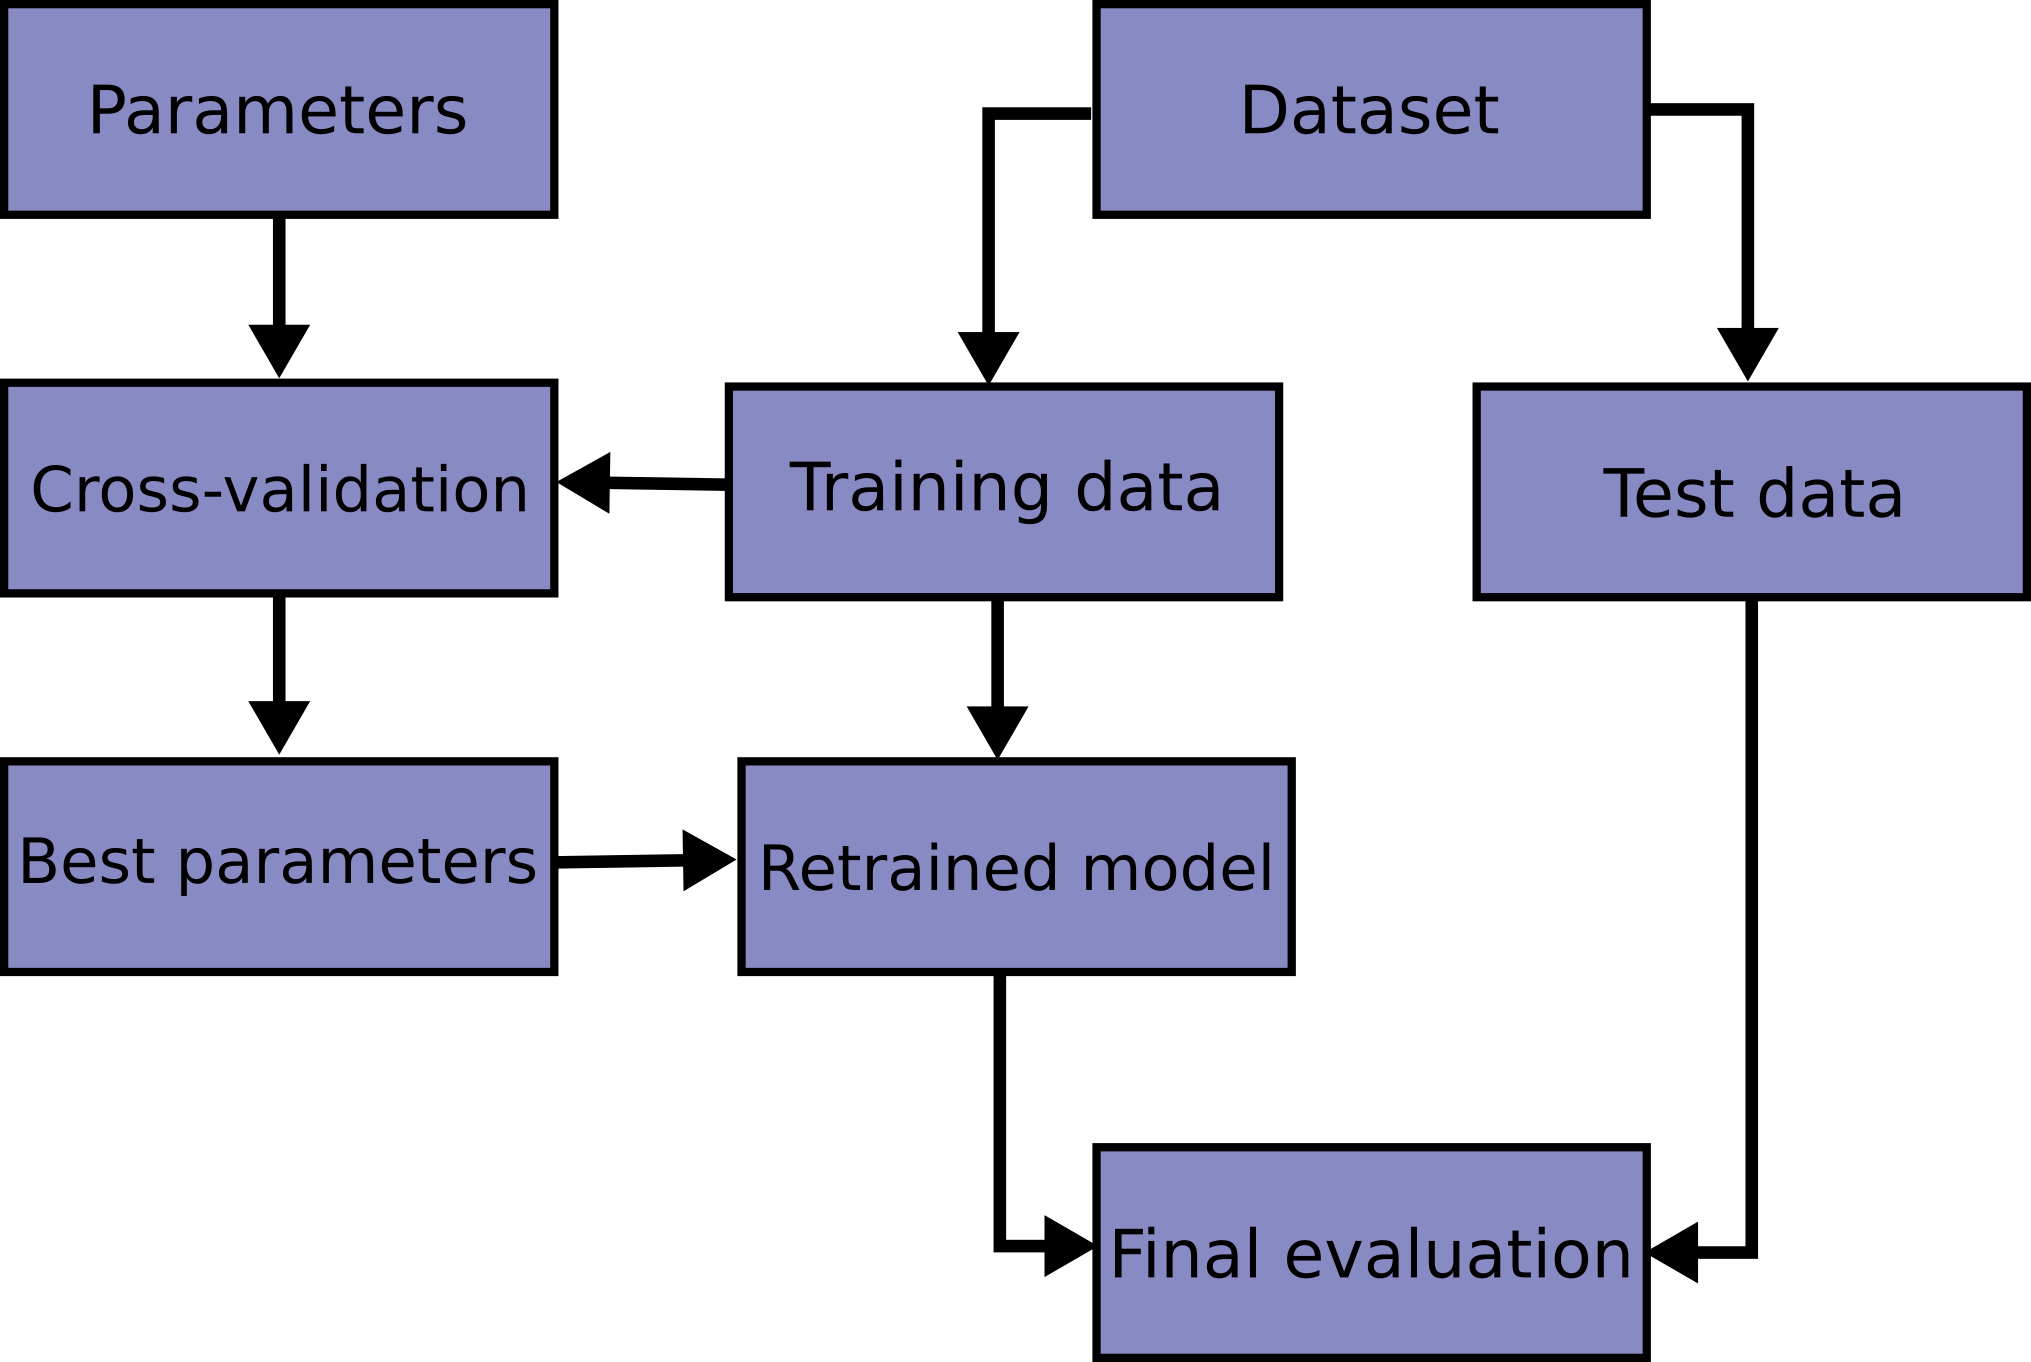



In [11]:
param = {"max_depth":[4,5,6,7,8,9,10,11],"min_samples_split":[2,3,4,5,6,7,8],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}
tree = DecisionTreeClassifier(random_state=78)
grid = GridSearchCV(tree, param, scoring="accuracy",cv=cv)

In [12]:
grid.fit(X_t, y_t)

grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [13]:
grid.best_params_, grid.best_score_

({'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2},
 0.7592857142857143)

In [14]:
print(grid.score(X_t, y_t),grid.score(X_test, y_test))

0.8135714285714286 0.7416666666666667


In [15]:
results.loc[:,"Hyperparmeter_Model"] = [grid.score(X_t, y_t),grid.best_score_,grid.score(X_test, y_test)]
results

<ipython-input-15-3f64b7fd82fa>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:,"Hyperparmeter_Model"] = [grid.score(X_t, y_t),grid.best_score_,grid.score(X_test, y_test)]


,Base_Model,Hyperparmeter_Model
Train,1.000000,0.813571
Valid,0.710714,0.759286
Test,0.700000,0.741667


In [16]:
X_t, X_test, y_t, y_test = train_test_split(X,y,test_size=0.3,random_state=48)

tree = DecisionTreeClassifier()

tree.fit(X_t, y_t)

DecisionTreeClassifier()

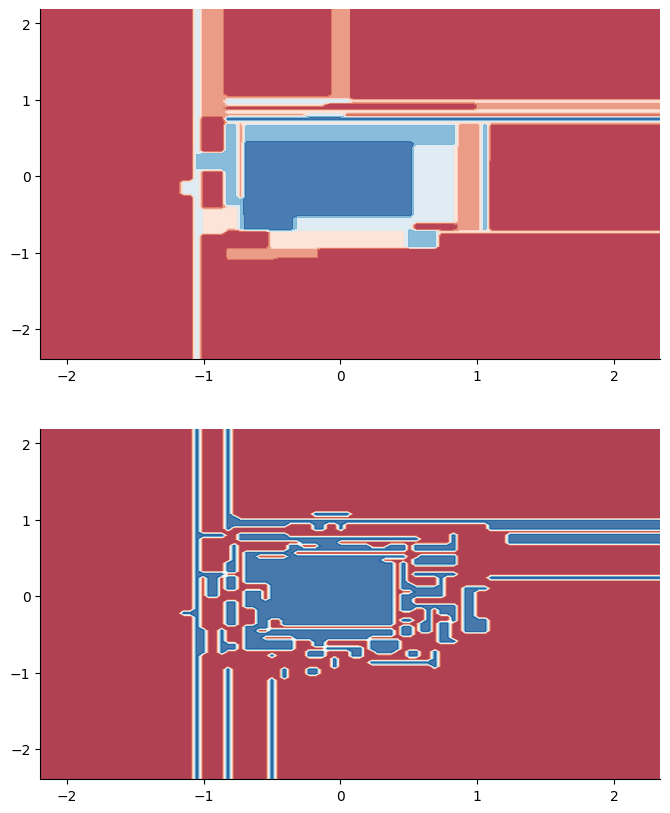

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay

#X= pd.DataFrame(data=X)
cm = plt.cm.RdBu
fig, ax = plt.subplots(2,1,figsize=(8,10))
DecisionBoundaryDisplay.from_estimator(grid, X, cmap=cm, alpha=0.8, ax=ax[0], eps=0.5);
DecisionBoundaryDisplay.from_estimator(tree, X, cmap=cm, alpha=0.8, ax=ax[1], eps=0.5);


Unconstrained Tree


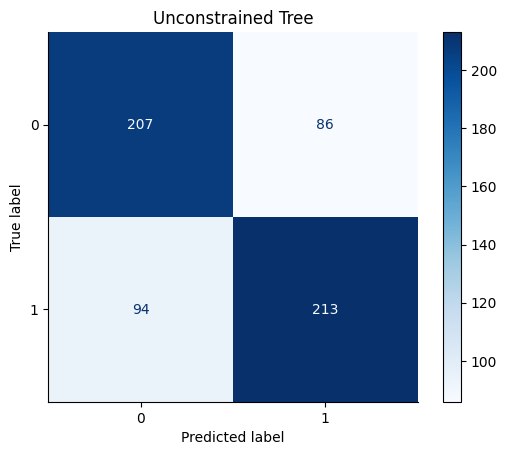

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    tree,
    X_test,
    y_test,
    display_labels=[0,1],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Unconstrained Tree")

print("Unconstrained Tree")
#print(disp.confusion_matrix)

Hyperpar Opt Tree


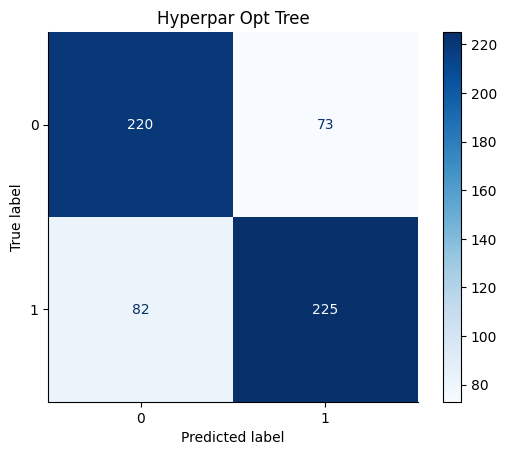

In [19]:
disp = ConfusionMatrixDisplay.from_estimator(
    grid,
    X_test,
    y_test,
    display_labels=[0,1],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Hyperpar Opt Tree")

print("Hyperpar Opt Tree")
#print(disp.confusion_matrix)

## Bias Variance Trade-Off

https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html



\begin{equation*}
	\underbrace{E_{\mathbf{x}, y, D} \left[\left(h_{D}(\mathbf{x}) - y\right)^{2}\right]}_\mathrm{Expected\;Test\;Error} = \underbrace{E_{\mathbf{x}, D}\left[\left(h_{D}(\mathbf{x}) - \bar{h}(\mathbf{x})\right)^{2}\right]}_\mathrm{Variance} + \underbrace{E_{\mathbf{x}, y}\left[\left(\bar{y}(\mathbf{x}) - y\right)^{2}\right]}_\mathrm{Noise} + \underbrace{E_{\mathbf{x}}\left[\left(\bar{h}(\mathbf{x}) - \bar{y}(\mathbf{x})\right)^{2}\right]}_\mathrm{Bias^2}
\end{equation*}

**Variance**: Captures how much your classifier changes if you train on a different training set. How "over-specialized" is your classifier to a particular training set (overfitting)? If we have the best possible model for our training data, how far off are we from the average classifier?

**Bias**: What is the inherent error that you obtain from your classifier even with infinite training data? This is due to your classifier being "biased" to a particular kind of solution (e.g. linear classifier). In other words, bias is inherent to your model.

**Noise**: How big is the data-intrinsic noise? This error measures ambiguity due to your data distribution and feature representation. You can never beat this, it is an aspect of the data.

**Bulleyes Plot**

-------------------------------------



https://scott.fortmann-roe.com/docs/BiasVariance.html

https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229


# **2.0 BANKRUPTCY DATASET**

### **2.1 Connect Drives**

Verify System:

In [20]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [21]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

Change Working Folders:

In [22]:
old_wd = os.getcwd()
print(old_wd)

/content


In [23]:
bankrupt_folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy"
bankrupt_folder_split_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy/Bankruptcy_dataset_split"
bankrupt_folder_train_test = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy/Bankruptcy_train_test_data"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Bankruptcy Models"
train_val_folder = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy/Bankruptcy_dataset_tv"

list_directories = [bankrupt_folder_data,bankrupt_folder_split_data,bankrupt_folder_train_test,models_folders,train_val_folder]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(bankrupt_folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy/Bankruptcy_dataset_split already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy/Bankruptcy_train_test_data already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Bankruptcy Models already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Bankruptcy/Bankruptcy_dataset_tv already exists


## **2.2 Import Data and Basic Checks**

In [24]:
pd.read_csv("bankruptcy.csv").shape
columns = ["y"]
features = [f"X{i}" for i in range(1,96)]
columns += features
df_colnames = pd.read_csv("bankruptcy.csv").head(3)
df = pd.read_csv("bankruptcy.csv", header=0, names=columns)

dict_colnames = dict(zip(list(df.columns),list(df_colnames.columns)))

#with pd.read_csv("bankruptcy.csv", chunksize=402) as reader:
#  for num, chunk in enumerate(reader):
#          print(num, " : ", chunk.shape)

In [25]:
df.sample(5, random_state=4)

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
2400,0,0.482572,0.550262,0.535789,0.613918,0.613918,0.999156,0.797578,0.809489,0.303462,...,0.805946,0.011432,0.621954,0.613916,0.840860,0.279876,0.026930,0.565745,1,0.028865
2294,1,0.459221,0.524041,0.512233,0.594654,0.594654,0.998932,0.797336,0.809269,0.303510,...,0.787988,0.001422,0.622856,0.594649,0.838838,0.289838,0.026137,0.556960,1,0.016619
6015,0,0.551309,0.602540,0.592537,0.602740,0.602740,0.999033,0.797510,0.809406,0.303602,...,0.828822,0.000595,0.624601,0.602741,0.842144,0.277288,0.026832,0.565348,1,0.047371
158,1,0.456101,0.520715,0.510895,0.597630,0.597818,0.998938,0.797333,0.809271,0.303491,...,0.789400,0.001480,0.623399,0.597631,0.839201,0.286551,0.026478,0.563037,1,0.018387
5918,0,0.491688,0.548735,0.543605,0.602084,0.602055,0.999015,0.797425,0.809340,0.303489,...,0.802853,0.004431,0.623846,0.602081,0.840721,0.282271,0.027294,0.566782,1,0.022986


* Split dataset in Train-Validation-Test sets

In [26]:
X = df.drop("y", axis=1).values
y = df.y.values

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True, stratify=y, test_size=0.138, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,shuffle=True, stratify=y_train, test_size=0.16)

print("Bankrupts in train set: {}\nBankrupts in test set: {}\n".format(np.sum(y_train),np.sum(y_test)))

print("Shape of train set: {}\nShape of test set: {}\n".format(X_train.shape,X_test.shape))

Bankrupts in train set: 190
Bankrupts in test set: 30

Shape of train set: (5877, 95)
Shape of test set: (942, 95)



* Rearrange data in Dataframes:

In [27]:
df_train = pd.DataFrame(data=X_train, columns=list(df.columns)[1:])
df_train["y"]=y_train

df_test = pd.DataFrame(data=X_test, columns=list(df.columns)[1:])
df_test["y"]=y_test

* y is the target feature, X85 and X94 are quickly analyzed:

In [28]:
print(f"Unique values for X85: {df_train.X85.unique()}\nUnique values for X94: {df_train.X94.unique()}")

Unique values for X85: [0. 1.]
Unique values for X94: [1.]


* X94 (Net Income Flag) has no variance, therefore can be dropped from the dataset:

In [29]:
df_train.drop("X94", axis=1, inplace=True)

* A quick peek in the target feature:

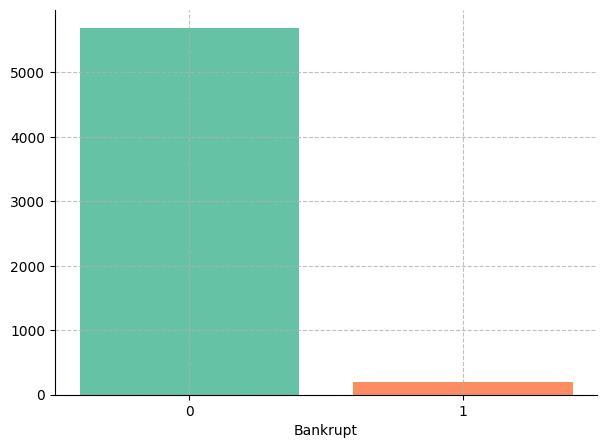

In [30]:
fig, axs = plt.subplots(figsize=(7,5))
axs.bar(x=df_train.y.unique(),height=df_train.y.value_counts(), color=palette_8)
axs.set_xlabel("Bankrupt")
axs.set_xticks([0,1])

axs.grid(linestyle='--', alpha=0.8, )

In [31]:
print("Bankrupts are {}% of the sample".format(np.round(100*df_train.y.sum()/df_train.y.count(),4)))

Bankrupts are 3.2329% of the sample


In [32]:
skf = StratifiedKFold(n_splits=10, random_state=4, shuffle=True)

for i, (train_index, valid_index) in enumerate(skf.split(df_train,df_train.y)):

  print(f"\nRunning CV {i}\n")
  # Prepare the Dataset:
  train_data_file = df_train.iloc[train_index,:]
  val_data_file = df_train.iloc[valid_index,:]
  print("Bankrupts are {}% of the sample".format(np.round(100*train_data_file.y.sum()/train_data_file.y.count(),4)))
  print("Bankrupts are {}% of the sample".format(np.round(100*val_data_file.y.sum()/val_data_file.y.count(),4)))


Running CV 0

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 1

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 2

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 3

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 4

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 5

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 6

Bankrupts are 3.2331% of the sample
Bankrupts are 3.2313% of the sample

Running CV 7

Bankrupts are 3.2325% of the sample
Bankrupts are 3.2368% of the sample

Running CV 8

Bankrupts are 3.2325% of the sample
Bankrupts are 3.2368% of the sample

Running CV 9

Bankrupts are 3.2325% of the sample
Bankrupts are 3.2368% of the sample


In [33]:
skf = KFold(n_splits=10, random_state=48, shuffle=True)

for i, (train_index, valid_index) in enumerate(skf.split(df_train)):

  print(f"\nRunning CV {i}\n")
  # Prepare the Dataset:
  train_data_file = df_train.iloc[train_index,:]
  val_data_file = df_train.iloc[valid_index,:]
  print("Bankrupts are {}% of the Training sample".format(np.round(100*train_data_file.y.sum()/train_data_file.y.count(),4)))
  print("Bankrupts are {}% of the Validation sample".format(np.round(100*val_data_file.y.sum()/val_data_file.y.count(),4)))


Running CV 0

Bankrupts are 3.3088% of the Training sample
Bankrupts are 2.551% of the Validation sample

Running CV 1

Bankrupts are 3.2142% of the Training sample
Bankrupts are 3.4014% of the Validation sample

Running CV 2

Bankrupts are 3.1953% of the Training sample
Bankrupts are 3.5714% of the Validation sample

Running CV 3

Bankrupts are 3.3277% of the Training sample
Bankrupts are 2.381% of the Validation sample

Running CV 4

Bankrupts are 3.1008% of the Training sample
Bankrupts are 4.4218% of the Validation sample

Running CV 5

Bankrupts are 3.2331% of the Training sample
Bankrupts are 3.2313% of the Validation sample

Running CV 6

Bankrupts are 3.1575% of the Training sample
Bankrupts are 3.9116% of the Validation sample

Running CV 7

Bankrupts are 3.2514% of the Training sample
Bankrupts are 3.0664% of the Validation sample

Running CV 8

Bankrupts are 3.2514% of the Training sample
Bankrupts are 3.0664% of the Validation sample

Running CV 9

Bankrupts are 3.2892% of